Columns: Index(['Month', 'AirPassengers'], dtype='object')


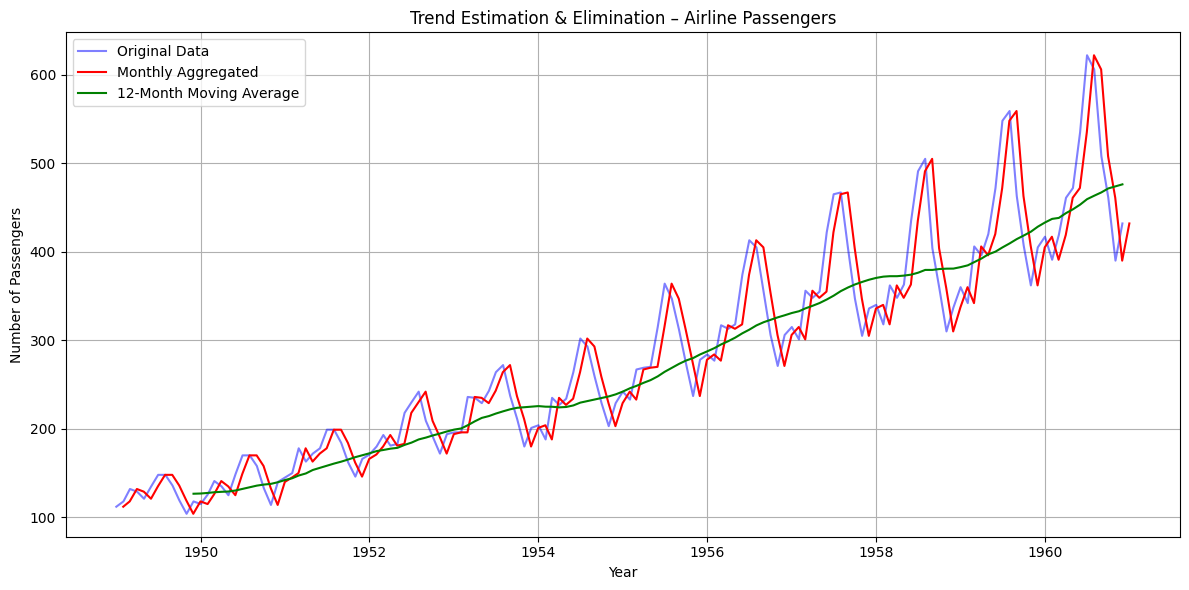

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("/content/ch3_airline_passengers.csv")

# Check actual column names
print("Columns:", df.columns)

# Rename for consistency (optional but useful)
df.columns = [col.strip().replace("#", "") for col in df.columns]

# Convert Month to datetime and set as index
df["Month"] = pd.to_datetime(df["Month"])
df.set_index("Month", inplace=True)

# Resample safely with 'ME' (Month End)
df_monthly = df.resample("ME").mean()

# Use correct column name after renaming
column_name = df.columns[0]  # Assuming the column is now just "Passengers"
df["SMA_12"] = df[column_name].rolling(window=12).mean()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df[column_name], label="Original Data", color="blue", alpha=0.5)
plt.plot(df_monthly, label="Monthly Aggregated", color="red")
plt.plot(df["SMA_12"], label="12-Month Moving Average", color="green")
plt.legend()
plt.title("Trend Estimation & Elimination – Airline Passengers")
plt.xlabel("Year")
plt.ylabel("Number of Passengers")
plt.grid(True)
plt.tight_layout()
plt.show()
